In [357]:
from matplotlib import pyplot as plt

import pandas as pd

In [358]:
df = pd.read_csv(r'~/Desktop/Personal/Fun/fun_maths/all_tests.csv')

In [359]:
df.head()

,n,trials,k,succeses,failures,p,draw
0,N=4,trials=10000,k=10,success=6117,failures=2613,p=0.6117,draw=0
1,N=4,trials=10000,k=10,success=6068,failures=2624,p=0.6068,draw=0
2,N=4,trials=10000,k=10,success=6033,failures=2727,p=0.6033,draw=0
3,N=6,trials=10000,k=10,success=6143,failures=1468,p=0.6143,draw=0
4,N=6,trials=10000,k=20,success=6670,failures=2422,p=0.667,draw=0


In [360]:
def clean_df(df):
    df['n'] = df['n'].str[2:].astype(int)
    df['trials'] = df['trials'].str[8:].astype(int)
    df['k'] = df['k'].str[3:].astype(int)
    df['failures'] = df['failures'].str[10:].astype(int)
    df['successes'] = df['succeses'].str[9:].astype(int)
    df['draws'] = df['trials'] - df['successes'] - df['failures']
    df['p'] = df['p'].str[3:].astype(float)
    df = df.drop(['succeses', 'draw'], axis=1)
    return df

In [361]:
df = clean_df(df)

In [362]:
df

,n,trials,k,failures,p,successes,draws
0,4,10000,10,2613,0.6117,6117,1270
1,4,10000,10,2624,0.6068,6068,1308
2,4,10000,10,2727,0.6033,6033,1240
3,6,10000,10,1468,0.6143,6143,2389
4,6,10000,20,2422,0.6670,6670,908
...,...,...,...,...,...,...,...
756,12,10000,200,2210,0.7681,7681,109
757,12,10000,210,2190,0.7707,7707,103
758,14,10000,200,2007,0.7874,7874,119
759,14,10000,210,2096,0.7793,7793,111


In [363]:
df.columns

Index(['n', 'trials', 'k', 'failures', 'p', 'successes', 'draws'], dtype='object')

In [364]:
df.dtypes

n              int64
trials         int64
k              int64
failures       int64
p            float64
successes      int64
draws          int64
dtype: object

In [365]:
# N = 2
df.where(df['n']==2).sort_values(by=['trials', 'k', 'p'], ascending=[False, False, False]).head()

,n,trials,k,failures,p,successes,draws
747,2.0,10000.0,210.0,4919.0,0.5081,5081.0,0.0
733,2.0,10000.0,210.0,4963.0,0.5037,5037.0,0.0
721,2.0,10000.0,210.0,5025.0,0.4975,4975.0,0.0
732,2.0,10000.0,200.0,4861.0,0.5139,5139.0,0.0
746,2.0,10000.0,200.0,4980.0,0.5020,5020.0,0.0


In [366]:
n_values = df.n.unique()

In [367]:
a = []
for i in n_values:
    a.append(
        max(
            df.where(df['n']==i)
            .where(df['trials']==10000)
            .where(df['k']>=90)
            .sort_values(by=['p'], ascending=[False])['p']
        )
    )
b = []
for i in n_values:
    b.append(
        min(
            df.where(df['n']==i)
            .where(df['trials']==10000)
            .where(df['k']>=90)
            .sort_values(by=['p'], ascending=[False])['p']
        )
    )

df_proposals = pd.DataFrame({
    'n': n_values,
    'p_max': a,
    'p_min': b
})
df_proposals

,n,p_max,p_min
0,4,0.6294,0.6193
1,6,0.6994,0.6804
2,2,0.5139,0.4974
3,8,0.7313,0.7171
4,10,0.7576,0.7443
5,12,0.7715,0.7564
6,14,0.7917,0.7793


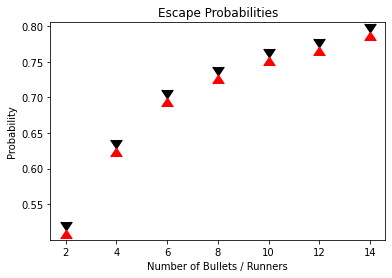

In [369]:
plt.figure()
a = 128
plt.scatter(df_proposals['n'],df_proposals['p_max'],a,'k', marker=7)
plt.scatter(df_proposals['n'],df_proposals['p_max'],a,'r', marker=6)
plt.title('Escape Probabilities')
plt.xlabel('Number of Bullets / Runners')
plt.ylabel('Probability')
plt.show()